# Lecture 1: Numerical differentiation
<br />

> *Computational mathematics is mainly based on two ideas: Taylor series, and linear algebra.* - Nick Trefethen

## Motivation

An object with mass 1 kg is moving along one dimension. The velocity of the object is measured at  _equidistant_ times:

| t [s] | 2 | 4 | 6 | 8 | 10 | 12 |
| -- | -- | -- | -- | -- | -- | -- |
| v [m/s]  | 0.5 | 1 | 3 | 0.2 | 1 | 2  |

What is the force applied to the object as a function of time?


From Newton's second law, we know that $F=m\times \partial v / \partial t$. So, we need to compute the differential of the data in the table. But the data is _discrete_ ! How can we do this? Before presenting a solution to this problem, we need to review some mathematical tools.

## Problem statement

Let $f(x)\in\mathcal{C}[a,b]$ be a function of which we only know its value at certain points, $f(x_i)=y_i$, $i=0,...,n$. Then, we look for an approximation of $f^{(1)}(x_i)$ (i.e., the first differential of $f$ at $x_i$) based on the available data. To do this, we need to introduce (or refresh) some useful theoretical concepts.


***Note***: In this lecture (and some of the following) we use the notation $f^{(1)}(x)$ for the first differential rather than the beloved $f'(x)$. The reason is that we will require higher order differentials (as you will see next). In such cases, it is better to write, e.g., $f^{(17)}(x)$ rather than $f^{XVII}(x)$! We will always use the easiest notation.

## Taylor series and theorem

The computation of differentials based on discrete data relies on Taylor expansions of the function $f$ that generated it, although it is usualy unknown (as in the motivation). Let $f\in\mathcal{C}^\infty[x,x+h]$ (or, in other words, $f$ is a continuous function _infinitely differentiable_ in the interval $[x,x+h]$) and $h>0$. Then, we can expand the function $f$ in Taylor series,

\begin{align*}
f(x+h)&=f(x)+f^{(1)}(x)h+\frac{f^{(2)}(x)}{2!}h^2+...+\frac{f^{(n)}(x)}{n!}h^n+...\\&=\sum_{k=0}^\infty \frac{f^{(k)}(x)}{k!}h^k.
\end{align*}

If $f\in\mathcal{C}^{n+1}[x,x+h]$, we can approximate $f$ up to the $nth$ term,

\begin{align}
f(x+h)&=f(x)+f^{(1)}(x)h+\frac{f^{(2)}(x)}{2!}h^2+...+\frac{f^{(n)}(x)}{n!}h^n+E_n(x)\\
&=\sum_{k=0}^n \frac{f^{(k)}(x)}{k!}h^k+E_n(x),
\end{align}

where $E_n(x)$ is the error term, generally referred to as the _remainder_ or _residual_. It can be shown that there exist a number $\xi(x)$ between $x$ and $x+h$ such that

$$E_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}h^{n+1}. \tag{1}$$

These equations are referred to as _Taylor theorem_.

**Important notes:**

1. If we know $f$, the residual term can be easily computed by subtracting the Taylor approximation to it.
2. If we do not know $f$, we are forced to use $E_n(x)$. However, since $\xi(x)$ is not known, the residual cannot be computed without uncertainty (although we will use it quite a lot!)
3. The term $E_n(x)$ appears because we are truncating the Taylor series. For that reason, we will call it _truncation error_.


**Example.** Expand the functions $f(x+h)$ and $g(x+h)$ around $x$ up to the second term, and assuming they satisfy the continuity conditions. We get:

\begin{align*}
&f(x+h)=f(x)+f^{(1)}(x)h+\frac{f^{(2)}(x)}{2!}h^2+\frac{f^{(3)}(\xi_1^\ast)}{3!}h^3,\ \ \ \ \ \  \xi_1^\ast \in [x,x+h],\\ &g(x+h)=g(x)+g^{(1)}(x)h+\frac{g^{(2)}(x)}{2!}h^2+\frac{g^{(3)}(\xi_2^\ast)}{3!}h^3,\ \ \ \ \ \  \xi_2^\ast \in [x,x+h],
\end{align*}

where the last terms are the truncation errors. Since $f$ and $g$ are not necessarily equal, $\xi_1^\ast$ is not necessarily equal to $\xi_2^\ast$. And, even in the case that $f=g$, $\xi_1^\ast$ will not necessarily be equal to $\xi_2^\ast$! In other words, both are unknown (and likely different) values in $[x,x+h]$.

---

## Back to differentiation

Now, we will use the Taylor theorem to approximate the derivative of the function $f(x)$ evaluated in a set of discrete points $x_i$, $i=0, 1, 2, ...$. As in the motivation example, we assume that points are equidistant, with step size $h=x_k-x_{k-1}$, for any $k>1$. We start by expanding $f(x+h)$ and $f(x-h)$ up to the second term:

\begin{align}
f(x+h)&=f(x)+f^{(1)}(x)h+\frac{f^{(2)}(x)}{2!}h^2+\frac{f^{(3)}(\xi_1^\ast)}{3!}h^3,\ \ \ \ \  \xi_1^\ast \in [x,x+h],\label{xph}\\
f(x-h)&=f(x)-f^{(1)}(x)h+\frac{f^{(2)}(x)}{2!}h^2-\frac{f^{(3)}(\xi_2^\ast)}{3!}h^3,\ \ \ \ \  \xi_2^\ast \in [x-h,x].\label{xmh}
\end{align}

We now subtract the second from the first equation,

$$f(x+h)-f(x-h)=2 h f^{(1)}(x)+\frac{h^3}{3!}\left(f^{(3)}(\xi_1^\ast) + f^{(3)}(\xi_2^\ast) \right).$$

After few algebraic manipulations, we get

$$f^{(1)}(x)=\frac{f(x+h)-f(x-h)}{2h} - \frac{h^2}{6}\frac{f^{(3)}(\xi_1^\ast) + f^{(3)}(\xi_2^\ast)}{2}.$$

Using the Intermediate Value Theorem <sup>[1]</sup>, there exist $\xi^\ast\in(x-h,x+h)$ such that

$$\frac{f^{(3)}(\xi_1^\ast) + f^{(3)}(\xi_2^\ast)}{2}=f^{(3)}(\xi^\ast).$$

We just showed the following theorem.


**Theorem (symmetric $O(h^2)$ difference formula):** Let $f\in\mathcal{C}^3 [a,b]$. Then,


$$f^{(1)}(x)=\frac{f(x+h)-f(x-h)}{2h} +E_{trunc},$$

with

$$E_{trunc}=- \frac{h^2}{6}f^{(3)}(\xi^\ast).$$

In other words, we can approximate the first differential of a function $f$ at $x_0$ given the value of the function at the equidistant points $x_0-h$ and $x_0+h$:


$$f^{(1)}(x_0)\approx\frac{f(x+h)-f(x-h)}{2h} .$$



<a name="fnt2">1</a>: **Intermediate Value Theorem**: If a function $g\in\mathcal{C}[a,b]$ and $K$ is any number between $g(a)$ and $g(b)$, then there exist a number $c\in(a,b)$ such that $g(c)=K$.

**Important notes**:

* The truncation error $E_{trunc}$ is proportional to $h^2$. For this reason, we say that it is an $h^2$-order formula, and is written $E_{trunc}=O(h^2)$.
* In general, we compare formulas by comparing their orders. Convince yourself that for an $O(h^n)$ formula, the larger $n$ is, the better the approximation will be.
* There are plenty other formulas for approximating first order differentials. You will explore some of them in the lab.
* Higher order formulas are generally more complex (it is a trade-off).


**Example.** (Back to the initial motivation.) We use the $O(h^2)$ approximation for the tabulated points. In this case, $h=2$ s. Using the centred $O(h^2)$ approximation we get:

$$a(4)\approx\frac{v(6)-v(2)}{2 \times 2}m/s^2=\frac{3-0.5}{4} m/s^2=5/8\ m/s^2.$$

Repeating for the values in the table, we get:

| t [s] | 2 | 4 | 6 | 8 | 10 | 12 |
| -- | -- | -- | -- | -- | -- | -- |
| v [m/s]  | 0.5 | 1 | 3 | 0.2 | 1 | 2  |
| F [N]  | -- | 5/8 | -1/5 | -1/2 | 9/20 | -- |


What happened with the extremes? Can't we compute derivatives at those points? (You will study an answer in the lab. Short answer: yes, you can.)

---

The previous example was very simple to solve due to the reduced number of points in the table. However, things become more cumbersome when we have hundreds of values rather than six. For this reason, we implement it in Python.

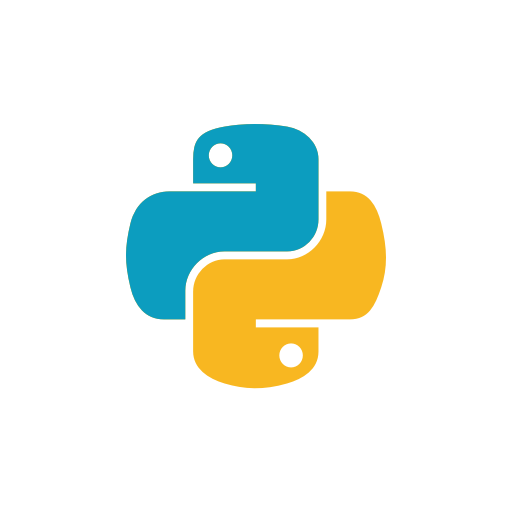


To implement the centred $O(h^2)$ numerical differential we assume we know the data, stored in the array ```f```, and the step size ```h```. Then, we can use indexing to compute it in a single line of code. How? Just by noting that the differential on each node is the difference between the function on the node on the right minus the function on the node on the left (and divided by $h^2$). More explicitly:

```( f(x[2::]) - f(x[0:-2]) ) / (2 * h)```.

Let's see this working.   

**Example.** We now fabricate a toy example to see how good the approximation is. In this example, we know the function, $f(x)=e^{-x}\sin (x)$, defined in the interval $[0,9]$. Of course, we know that the first differential is
$f^{(1)}(x)=e^{-x}(\cos(x)-\sin (x))$, but we can generate samples as those available in the motivation example for arbitrary step sizes $h$, and see how good the numerical solution is. In Python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

h = 1 # step size
x = np.arange(0, 9+h, h) # generate the support
f = np.exp(-x) * np.sin(x) # sample the function
fd = (f[2::] - f[0:-2]) / (2 * h) # approximate the differential using indexing

xa = np.arange(0, 9, 1e-2) # support for plotting the analytical solution
fa = np.exp(-xa) * (np.cos(xa) - np.sin(xa)) # analytical solution

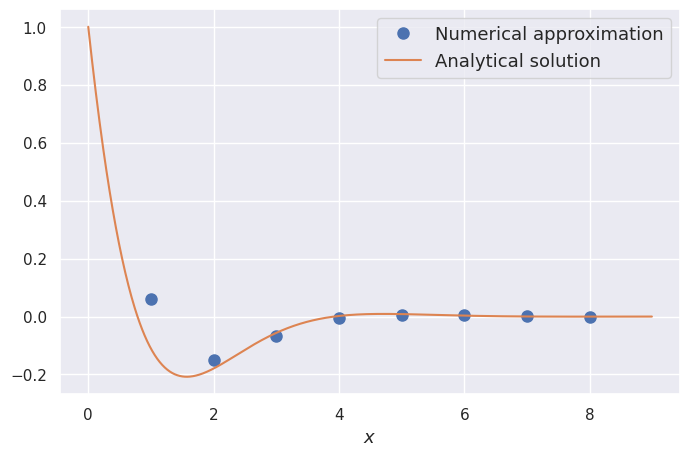

In [2]:
# plot
fig = plt.figure(figsize=(8, 5))
plt.plot(x[1:-1], fd, 'o', label='Numerical approximation', markersize=8)
plt.plot(xa, fa, label='Analytical solution')
plt.xlabel('$x$', fontsize=13)
plt.legend(fontsize=13);

You can easily check that reducing $h$ we obtain a better approximation.

In addition to plotting the numerical solution, we can use the computer to verify that the approximation is $O(h^2)$. How? We can simply compute the error obtained on an arbitrary point $x_0\in(0,9)$ for many step sizes $h$. If the resulting _Error vs. h_ curve is proportional to $h^2$, then we can say that the method is $O(h^2)$. In Python, we can define a callable function for $f(x)$ and use it in one line:    

In [3]:
def f(x):
    return np.exp(-x) * np.sin(x)

h = np.arange(1e-4, 1e-1, 1e-5) # values of h to test

x0 = 2 # test point
fa = np.exp(-x0) * (np.cos(x0) - np.sin(x0)) # analytical solution
fd = (f(x0+h) - f(x0-h)) / (2 * h) # approximation for every h
Error = np.abs(fd-fa)

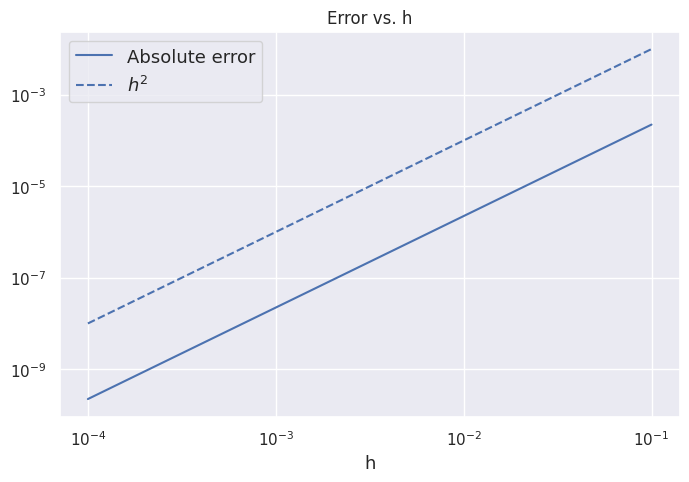

In [4]:
# plot
plt.figure(figsize=(8, 5))
plt.loglog(h, Error, '-', label='Absolute error', color='C0')
plt.loglog(h, h**2, '--', label='$h^2$', color='C0')
plt.xlabel('h', fontsize=13), plt.title('Error vs. h'), plt.legend(fontsize=13);

Both curves are proportional, and therefore we confirmed that the error goes to zero as $h^2$ (or, in other words, the method is effectively $O(h^2)$). Consequently, we can say that the smaller $h$ is, the better! Well, not always...

---

## Reducing the step size

As we suggested, the smaller $h$ is, the smaller the truncation error will be. Let's validate this with a toy example.

**Toy example.** Let $f(x)=\cos(x)$. We aim to find $f^{(1)}(0.8)$ employing the $O(h^2)$ formula and different step sizes. Since we know the correct answer, $f^{(1)}(0.8)=-\sin(0.8)$, we can compare results for different values of $h$. We are doing this by hand (!), so we will work with 6 decimal digits precision. We get:


| step size ($h$) |    $O(h^2)$ approximation to $f^{(1)}(0.8)$    | Absolute error|
| ---------- | ------------ | --------- |
|0.1 | $\frac{f(0.9)-f(0.7)}{2 \times 0.1}$=-0.716160 | 0.001196 |
|0.01 | $\frac{f(0.81)-f(0.79)}{2 \times 0.01}$=-0.717350 | 0.000006 |
|0.001 | $\frac{f(0.801)-f(0.799)}{2 \times 0.001}$=-0.717500 | 0.000144 |
|0.0001 | $\frac{f(0.8001)-f(0.7999)}{2 \times 0.0001}$=-0.71500 | 0.002356 |

What happened??? The short answer is that we introduced another source of error, the _rounding error_ due to using 6 decimal digits only. Let's study this in more detail.


## Optimal step size

We now consider the rounding error together with the truncation term,

\begin{align}
f(x_0-h)&=y_{-1}+e_{-1}, \label{roun1}\\f(x_0+h)&=y_{+1}+e_{+1}, \label{roun2}
\end{align}

where $f(x_0\pm h)$ is the actual value without error, $y_{\pm 1}$ is its approximation using $N$ decimal digits, and $e_{\pm 1}$ the error of such an approximation. Using them in the $O(h^2)$ centred formula, we obtain

$$f^{(1)}(x)=\frac{y_{+1}-y_{-1}}{2h} + \frac{e_{+1}-e_{-1}}{2h} - \frac{h^2}{6}f^{(3)}(\xi^\ast), \ \ \ \ \ \xi^\ast\in [a,b].$$

The error terms are now two:

* **Truncation error**: $E_{trunc}=- \frac{h^2}{6}f^{(3)}(\xi^\ast) \Rightarrow$ proportional to $h^2$.
* **Rounding error**: $E_{round}=\frac{e_{+1}-e_{-1}}{2h} \Rightarrow$ proportional to $h^{-1}$.

They compensate! Well, sort of. One term, the truncation error, decreases with increasing $h$, whereas the other error term, $E_{round}$, decreases for increasing $h$. Graphically:


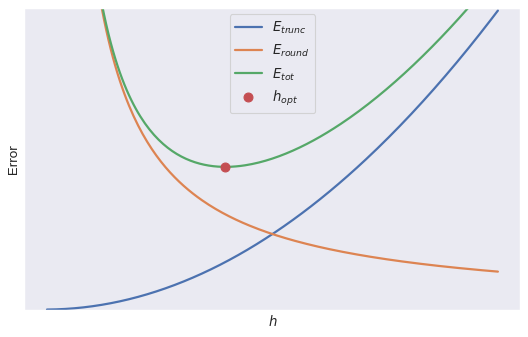

So, there must be an optimal step size $h_{opt}$ for which the total error is minimal. To find $h_{opt}$ we would need the errors, which we do not know (remember $\xi$ is unknown). Then, we try to find a good approximation to $h_{opt}$. To do so, we compute an _upper bound_ of the error. Using the Triangle inequality <sup>[2](#ftn3)</sup> we get:

$$|E_{tot}|=|E_{round}+ E_{trunc}|\leq |E_{round}|+ |E_{trunc}|.$$

Assume we know that $|f^{(3)}(\xi)| \leq M$, and that we know $M$. Then,

$$|E_{trunc}|=\left|  - \frac{h^2}{6}f^{(3)}(\xi^\ast)  \right|\leq \frac{h^2}{6}M.$$

To bound the rounding error, since we are considering $N$ decimal digits, we have $|e_{\pm 1}|\leq 0.5\times 10^{-N}$(convince yourself!). Then,

$$|E_{round}| = \left| \frac{e_{+1}-e_{-1}}{2h} \right| \leq \frac{10^{-N}}{h}.$$

Replacing in the first inequality, we get

$$|E_{tot}|\leq \frac{10^{-N}}{h}+\frac{h^2}{6}M.$$

To find the step size that minimises the error bound, we compute the differential of the bound with respect to $h$ and equal it to zero. This leads to

$$h_{opt}=\left(\frac{3 \times 10^{-N}}{M}\right)^{1/3}.$$

Now, back to the Toy example.

<a name="fnt3">3</a>: $|a+b| \leq |a|+ |b|$

**Toy example** (bis): In this case, $|f^{(3)}(\xi)|=|\sin(\xi)|\leq M=1$, and $N=6$. Then,

\begin{equation}
h_{opt}=\left(3 \times 10^{-6}\right)^{1/3}=0.0144.
\end{equation}

We confirm $h=0.01$ is a good choice, as found in the table. We can use Python to verify this, taking advantage of the ```round``` function available in Numpy:

In [5]:
h = np.arange(1e-4, 1e-1, 1e-5) # values of h to test
y = (np.round(np.cos(0.8+h), 6) - np.round(np.cos(0.8-h), 6)) / (2 * h) # O(h^2) approximation of the differential
Err = abs(y + np.sin(0.8)) # Calculate the error

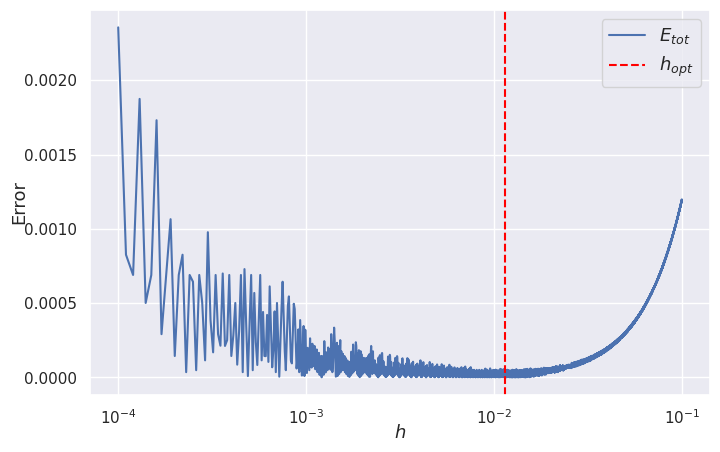

In [6]:
# plot
fig = plt.figure(figsize=(8, 5))
plt.semilogx(h, Err, label='$E_{tot}$')
plt.axvline(x = 0.0114, color='red', linestyle='--', label='$h_{opt}$')
plt.xlabel('$h$', labelpad=-2, fontsize=13)
plt.ylabel('Error', labelpad=-3, fontsize=13)
plt.legend(fontsize=13);

---

## Applications

Numerical differentials are used everywhere, as we will see during this course. One illustration of its use is in image processing. Greyscale images are discrete 2D arrays to which we can apply numerical algorithms, such as the differential operator. In particular, we can compute the gradient of an image by calculating the differential in both directions. The magnitude of the resulting gradient field will provide a rough approximation of the image boundaries!

In [7]:
# To load an image from an URL
from PIL import Image
import requests
from io import BytesIO

url = 'https://upload.wikimedia.org/wikipedia/commons/6/61/Rubiks_cube_solved.jpg'  # Replace with your URL
response = requests.get(url)
Im = Image.open(BytesIO(response.content))

# We now process it
from skimage.color import rgb2gray

Im = rgb2gray(Im) # convert to greyscale

def im_grad(I): # function to compute the gradient; the stepsize is considered as 1 [pixel]
    grad_x = (I[2::,1:-1] - I[0:-2,1:-1]) / 2
    grad_y = (I[1:-1,2::] - I[1:-1,0:-2]) / 2
    Mag = np.sqrt(grad_x**2 + grad_y**2)
    return Mag

Mag = im_grad(Im)
Mag_th = Mag > 0.1 # threshold the resulting gradient

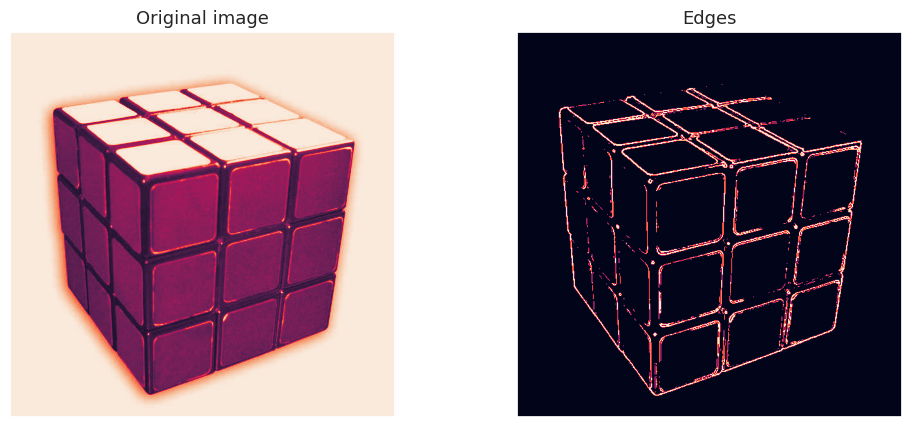

In [8]:
# plot
fig = plt.figure(figsize=(12, 5))
sns.set_style("dark")

plt.subplot(1, 2, 1)
plt.imshow(Im); plt.grid(False); plt.xticks([]); plt.yticks([]);
plt.title('Original image', fontsize=13)

plt.subplot(1, 2, 2)
plt.imshow(Mag_th); plt.grid(False); plt.xticks([]); plt.yticks([]);
plt.title('Edges', fontsize=13);

---

## Learning points

* Taylor series are **crucial** for Computational Physics
* Truncation errors allow to compare numerical differential formulas
* For an $O(h^n)$ formula, the larger $n$ is, the better
* Rounding errors can be noticeable if we use reduced precision

## Further reading

* Burden, Faires, and Burden. "Numerical Analysis". Chapter 4. Available as reading material.
